<a href="https://colab.research.google.com/github/kshipra-jadav/ztm-dl/blob/master/Transfer_Learning_with_TensorFlow_(Part_2)_ZTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with TensorFlow Part 2 - Fine Tuning

## Creating Helper Functions

Link - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-06 12:39:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-06 12:39:28 (91.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data

## Getting Some Data! 🚀

This time we are going to use pretrained models with `tf.keras.applications` and see how they will be applicable to our problem (identifying images of food)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-07-31 01:40:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   168MB/s    in 1.0s    

2023-07-31 01:40:53 (168 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
from helper_functions import walk_through_dir

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
base_dir = "10_food_classes_10_percent"
train_dir = f"{base_dir}/train"
test_dir = f"{base_dir}/test"
image_size = (224, 224)

In [ ]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         image_size=image_size,
                                                         label_mode="categorical")
test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        image_size=image_size,
                                                        label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
test_data, train_data

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

## Model 0: Building A Transfer Learning Model with Keras Sequential API

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 5. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)

# 6. Create output activation layer
outputs = tf.keras.layers.Dense(10, activation="sigmoid", name="output_layer")(x)

# 7. Combine the inputs and the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 8. Compile the model
model_0.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 9. Fit the model and save its history
model_0_history = model_0.fit(train_data,
                            validation_data=(test_data),
                            epochs=5,
                            callbacks=[create_tensorboard_callback(dir_name="transfer_learning_pt_2",
                                                                   experiment_name="10_percent_feature_extraction_model0")])

Saving TensorBoard log files to: transfer_learning_pt_2/10_percent_feature_extraction_model0/20230729-165918
Epoch 1/5
24/24 [==============================] - 17s 409ms/step - loss: 1.8097 - accuracy: 0.4480 - val_loss: 1.2440 - val_accuracy: 0.7680
Epoch 2/5
24/24 [==============================] - 12s 513ms/step - loss: 1.0694 - accuracy: 0.7707 - val_loss: 0.8399 - val_accuracy: 0.8284
Epoch 3/5
24/24 [==============================] - 8s 313ms/step - loss: 0.7689 - accuracy: 0.8373 - val_loss: 0.6825 - val_accuracy: 0.8432
Epoch 4/5
24/24 [==============================] - 9s 348ms/step - loss: 0.6200 - accuracy: 0.8693 - val_loss: 0.5966 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 9s 358ms/step - loss: 0.5273 - accuracy: 0.8840 - val_loss: 0.5472 - val_accuracy: 0.8616


In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


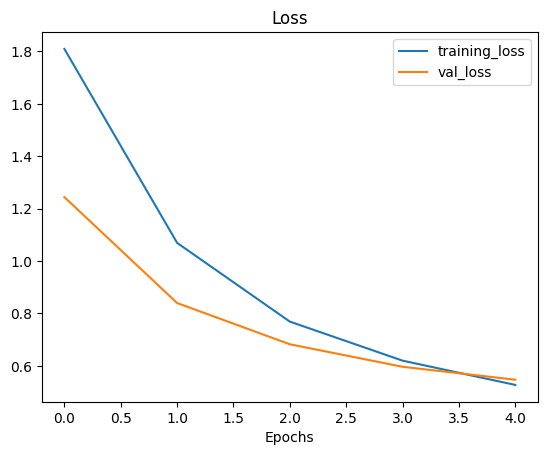

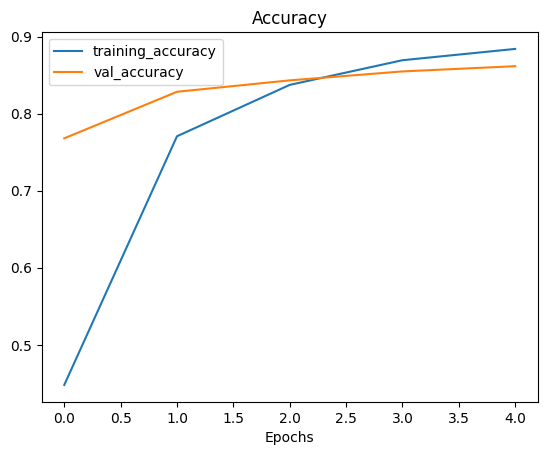

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(model_0_history)

## Running A Series Of Transfer Learning Experiments

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation
1. `model_2` - use feature extraction transfer learning with 10% of the trainning data with data augmentation
1. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation
1. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation

### `model_1` Experiments 🔥

In [ ]:
from helper_functions import unzip_data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-07-31 01:10:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  73.1MB/s    in 1.7s    

2023-07-31 01:10:50 (73.1 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
from helper_functions import walk_through_dir

walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'

In [ ]:
base_dir_1pc = "10_food_classes_1_percent"
train_dir_1pc = f"{base_dir_1pc}/train"
test_dir_1pc = f"{base_dir_1pc}/test"
image_size = (224, 224)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data_1pc = image_dataset_from_directory(train_dir_1pc,
                                              image_size=image_size,
                                              label_mode="categorical")
test_data = image_dataset_from_directory(test_dir_1pc,
                                              image_size=image_size,
                                              label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Adding Data Augmentation Into The Model

Adding Data Augmentation directly into the model has the following benefits :-
1. This data augmentation runs on the GPU instead of the CPU
2. This data augmentation will automatically turn on while training the model but will automatically turn off while testing the model.

Hence, it is advised to add data augmentation into the model like this.

In [ ]:
from tensorflow.keras import layers, Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentation")

data_augmentation

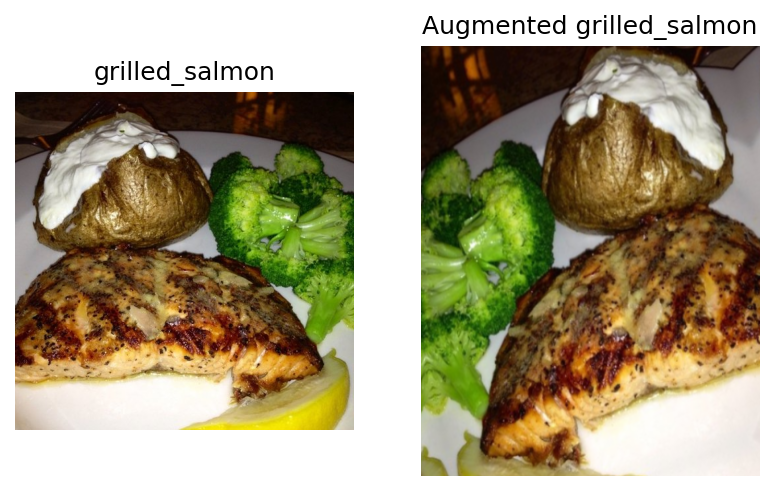

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import random
plt.rcParams['figure.dpi'] = 150

target_class = random.choice(train_data_1pc.class_names)
target_dir = os.path.join(train_dir_1pc, target_class)

random_image_name = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image_name

random_image = mpimg.imread(random_image_path)
augmented_image = data_augmentation(random_image, training=True) / 255.

plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.title(target_class)
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title(f"Augmented {target_class}")
plt.axis(False);

#### Making `model_1`

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

input_size = (224, 224, 3)
base_model = EfficientNetB0(include_top=False)
base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense

inputs = Input(shape=input_size, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = GlobalAveragePooling2D(name="global_avg_pooling")(x)

outputs = Dense(10, activation="softmax", name="output_layer")(x)

In [ ]:
from tensorflow.keras import Model
from helper_functions import create_tensorboard_callback

model_1 = Model(inputs, outputs, name="model_1")

model_1.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_1_1pc_history = model_1.fit(train_data_1pc,
                                  validation_data=test_data,
                                  epochs=5,
                                  callbacks=[create_tensorboard_callback(
                                      dir_name="transfer_learning",
                                      experiment_name="model_1_1pc_data_aug"
                                  )])

Saving TensorBoard log files to: transfer_learning/model_1_1pc_data_aug/20230731-012701
Epoch 1/5
3/3 [==============================] - 16s 4s/step - loss: 1.5133 - accuracy: 0.7429 - val_loss: 1.7011 - val_accuracy: 0.5220
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 1.3042 - accuracy: 0.8714 - val_loss: 1.6113 - val_accuracy: 0.5736
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 1.1594 - accuracy: 0.9000 - val_loss: 1.5316 - val_accuracy: 0.6156
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.0939 - accuracy: 0.9143 - val_loss: 1.4609 - val_accuracy: 0.6404
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 0.9526 - accuracy: 0.9714 - val_loss: 1.3980 - val_accuracy: 0.6684


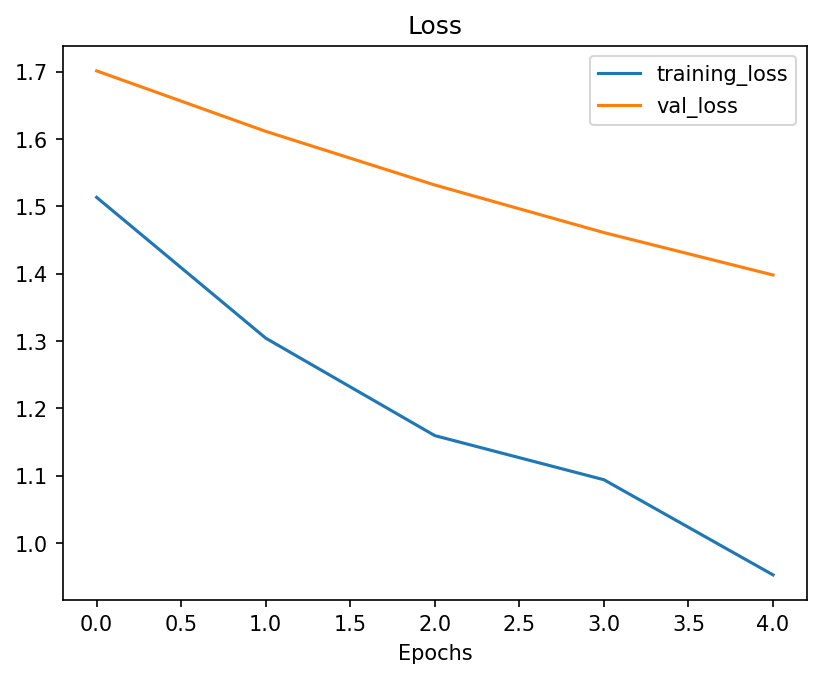

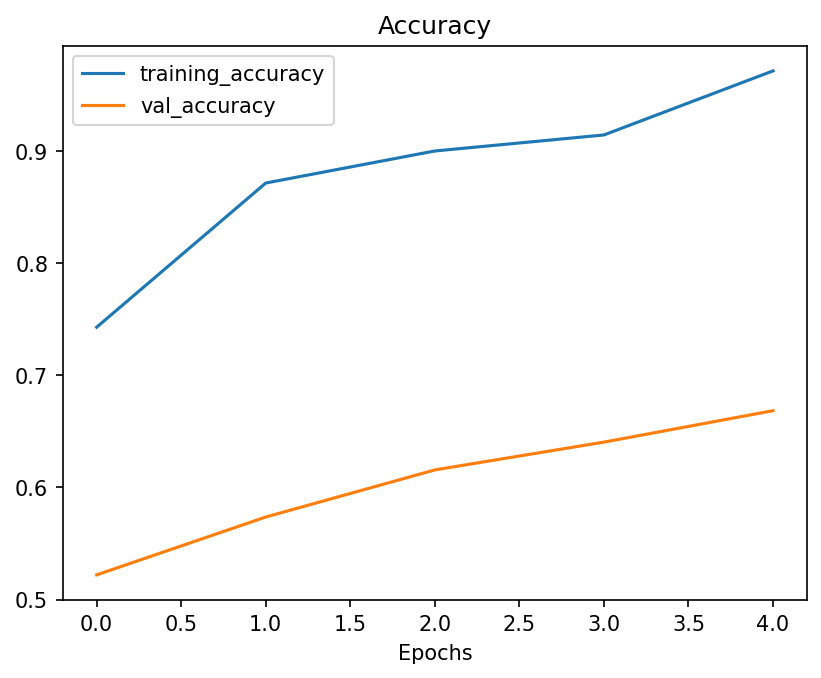

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(model_1_1pc_history)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Making `model_2` 🔥

> Same as `model_1` but with 10 percent training data instead of 1 percent

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-08-06 12:39:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   189MB/s    in 0.8s    

2023-08-06 12:39:11 (189 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
from helper_functions import unzip_data

unzip_data("10_food_classes_10_percent.zip")

In [8]:
from helper_functions import walk_through_dir

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [5]:
base_dir_10pc = "10_food_classes_10_percent"
train_dir_10pc = f"{base_dir_10pc}/train"
test_dir_10pc = f"{base_dir_10pc}/test"

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data_10pc = image_dataset_from_directory(train_dir_10pc,
                                               label_mode="categorical",
                                               image_size=(224, 224))
test_data_10pc = image_dataset_from_directory(test_dir_10pc,
                                               label_mode="categorical",
                                               image_size=(224, 224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
from tensorflow.keras import Sequential, layers

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2)
], name="data_augmentation")

data_augmentation

In [8]:
from tensorflow.keras.applications import EfficientNetB0

image_shape = (224, 224, 3)
base_model = EfficientNetB0(include_top=False)
base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [9]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras import Model

inputs = Input(shape=image_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = GlobalAveragePooling2D(name="global_avg_pooling")(x)

outputs = Dense(10, activation="softmax", name="output_layer")(x)

model_2 = Model(inputs, outputs, name="model_2")

In [10]:
from helper_functions import create_tensorboard_callback

model_2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [15]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling (GlobalA  (None, 1280)             0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Creating ModelCheckpoint Callback!

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "ten_percent_model_checkpoints/checkpoint.ckpt"

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      save_best_only=False,
                                      save_freq="epoch",
                                      verbose=1)

In [12]:
model_2_history = model_2.fit(train_data_10pc,
                              validation_data=test_data_10pc,
                              epochs=5,
                              callbacks=[create_tensorboard_callback(
                                  dir_name="transfer_learning",
                                  experiment_name="model_2_10pc_data_aug"
                              ), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2_10pc_data_aug/20230806-123948
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0103 - accuracy: 0.3520
Epoch 1: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 38s 937ms/step - loss: 2.0103 - accuracy: 0.3520 - val_loss: 1.4567 - val_accuracy: 0.6764
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3182 - accuracy: 0.6987
Epoch 2: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 23s 919ms/step - loss: 1.3182 - accuracy: 0.6987 - val_loss: 1.0031 - val_accuracy: 0.7840
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.7653
Epoch 3: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 16s 644ms/step - loss: 1.0186 - accuracy: 0.7653 - val_loss: 0.8027 - val_accuracy: 0.8128
Epoch 4/5
24/24 [======

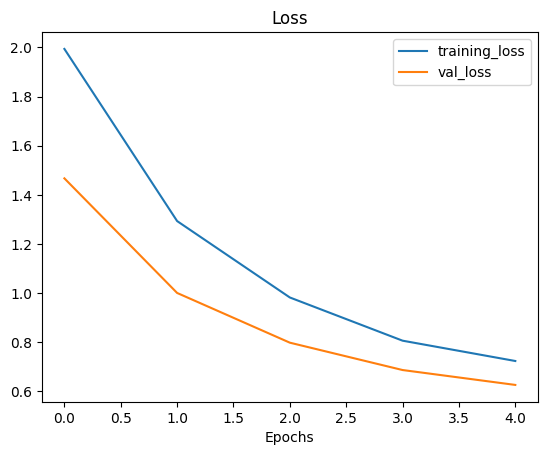

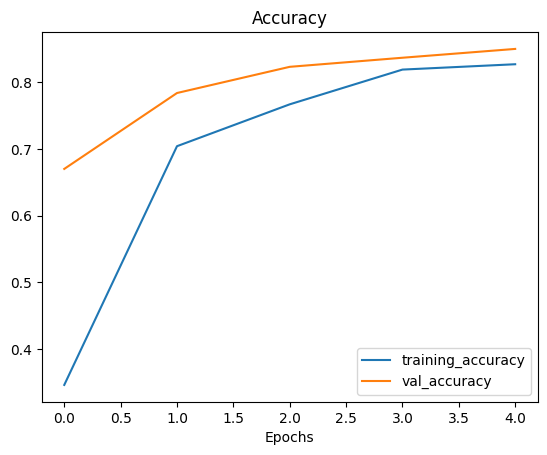

In [18]:
from helper_functions import plot_loss_curves

plot_loss_curves(model_2_history)

### Model 3 - Fine-Tuning an existing model on 10% of the data

In [19]:
model_2.layers

In [20]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f9dd004fd30> True
<keras.engine.sequential.Sequential object at 0x7f9dd4e5c700> True
<keras.engine.functional.Functional object at 0x7f9dd009dd20> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f9dd0145630> True
<keras.layers.core.dense.Dense object at 0x7f9dbdf148b0> True


In [21]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [22]:
# To begin fine-tuning, let us set all the parameters of our base_model to be trainable=True and then we will set all the layers except the last 10 to False

base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [23]:
from tensorflow.keras.optimizers import Adam

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(lr=0.0001),
                metrics=['accuracy'])

> 🔑 **Note** - Whenever we are compiling a model with unfrozen layers, it makes sense to lower its learning rate because we don't want our model to learn *too much*. Hence generally, we lower the learning rate by 10x.

In [24]:
print(len(model_2.trainable_variables))

12


In [25]:
model_2_history.epoch

[0, 1, 2, 3, 4]

In [26]:
# Refitting the fine-tuned model for another 10 epochs

model_2_fine_history = model_2.fit(train_data_10pc,
                                   validation_data=test_data_10pc,
                                   epochs=len(model_2_history.epoch) + 5,
                                   callbacks=[checkpoint_callback],
                                   initial_epoch=model_2_history.epoch[-1] # when we want to start from where we left off in the previous fitting rather than starting over
                                   )

Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.7893
Epoch 5: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 29s 745ms/step - loss: 0.6639 - accuracy: 0.7893 - val_loss: 0.4677 - val_accuracy: 0.8472
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8893
Epoch 6: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 15s 607ms/step - loss: 0.3403 - accuracy: 0.8893 - val_loss: 0.4338 - val_accuracy: 0.8504
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9320
Epoch 7: saving model to ten_percent_model_checkpoints/checkpoint.ckpt
24/24 [==============================] - 15s 610ms/step - loss: 0.1926 - accuracy: 0.9320 - val_loss: 0.4303 - val_accuracy: 0.8648
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.9613
Epoch 8: saving

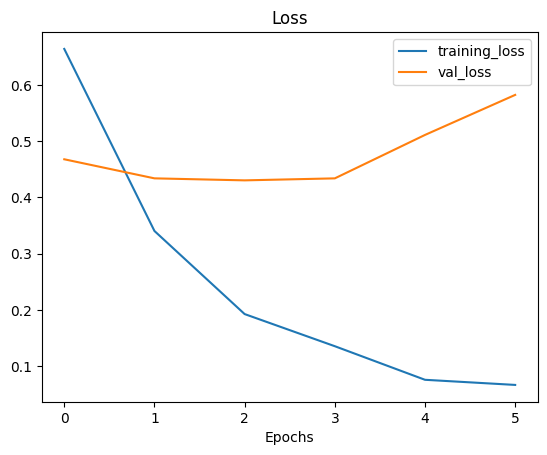

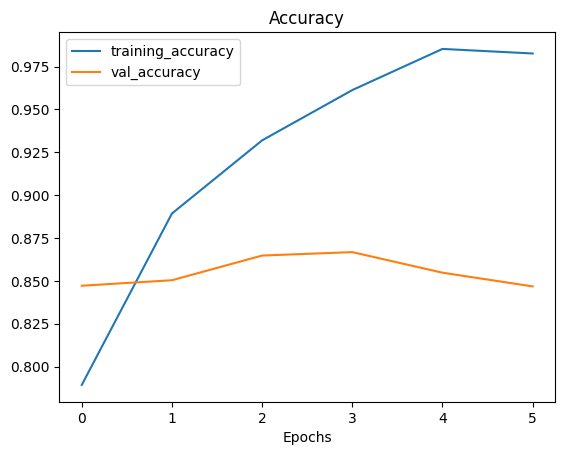

In [27]:
from helper_functions import plot_loss_curves

plot_loss_curves(model_2_fine_history)

Creating a function to compare the loss curves before fine tuning and after fine tuning

In [38]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 120

def compare_histories(old_history, new_history, initial_epochs=5):
  # Getting the original accuracy and loss
  acc = old_history.history["accuracy"]
  loss = old_history.history["loss"]

  val_acc = old_history.history["val_accuracy"]
  val_loss = old_history.history["val_loss"]

  # Combining the old values with the new values
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Plotting the figure to compare the accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)

  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation Accuracy")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Fine Tuning Started")

  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Plotting the figure to compare the loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)

  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Fine Tuning Started")

  plt.legend(loc="upper right")
  plt.title("Training and Validation Losses")

  plt.show()

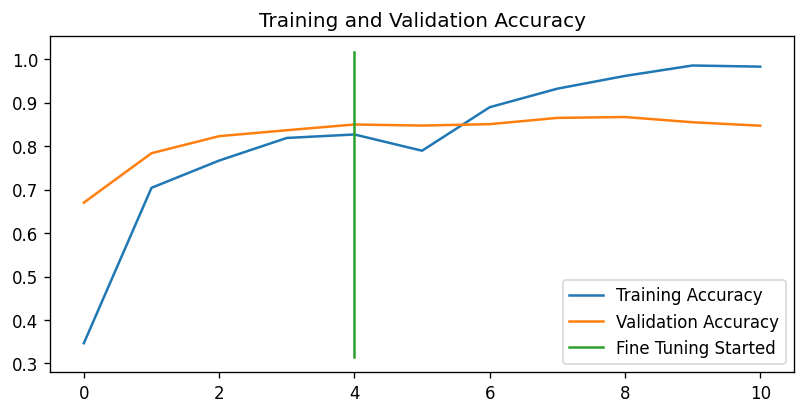

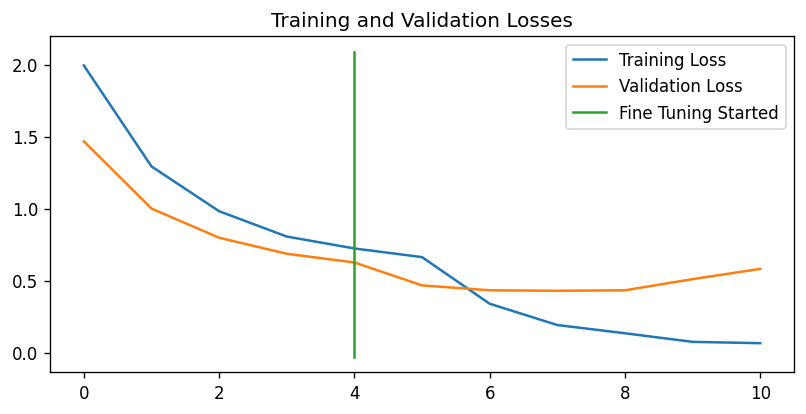

In [33]:
compare_histories(model_2_history, model_2_fine_history)

### `model_4` Fine Tuning A Model on **100%** Of Training Data

In [13]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-08-06 12:42:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   235MB/s    in 2.1s    

2023-08-06 12:42:25 (235 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [14]:
from helper_functions import unzip_data

unzip_data("10_food_classes_all_data.zip")

In [36]:
from helper_functions import walk_through_dir

walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [15]:
base_dir = "10_food_classes_all_data"
train_dir = f"{base_dir}/train"
test_dir = f"{base_dir}/test"

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data_100pc = image_dataset_from_directory(directory=train_dir,
                                              image_size=(224, 224),
                                              label_mode="categorical")

test_data_100pc = image_dataset_from_directory(directory=test_dir,
                                             image_size=(224, 224),
                                             label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [33]:
model_2.layers

In [34]:
for layer_num, layer in enumerate(model_2.layers[2].layers):
  print(layer_num, layer.name, layer.trainable, sep=" - ")

0 - input_1 - False
1 - rescaling - False
2 - normalization - False
3 - rescaling_1 - False
4 - stem_conv_pad - False
5 - stem_conv - False
6 - stem_bn - False
7 - stem_activation - False
8 - block1a_dwconv - False
9 - block1a_bn - False
10 - block1a_activation - False
11 - block1a_se_squeeze - False
12 - block1a_se_reshape - False
13 - block1a_se_reduce - False
14 - block1a_se_expand - False
15 - block1a_se_excite - False
16 - block1a_project_conv - False
17 - block1a_project_bn - False
18 - block2a_expand_conv - False
19 - block2a_expand_bn - False
20 - block2a_expand_activation - False
21 - block2a_dwconv_pad - False
22 - block2a_dwconv - False
23 - block2a_bn - False
24 - block2a_activation - False
25 - block2a_se_squeeze - False
26 - block2a_se_reshape - False
27 - block2a_se_reduce - False
28 - block2a_se_expand - False
29 - block2a_se_excite - False
30 - block2a_project_conv - False
31 - block2a_project_bn - False
32 - block2b_expand_conv - False
33 - block2b_expand_bn - False
3

In [35]:
model_2.layers[2].trainable = True

for layer in model_4.layers[2].layers[:-10]:
  layer.trainable = False

for layer_num, layer in enumerate(model_4.layers[2].layers):
  print(layer_num, layer.name, layer.trainable, sep=" - ")

0 - input_1 - False
1 - rescaling - False
2 - normalization - False
3 - rescaling_1 - False
4 - stem_conv_pad - False
5 - stem_conv - False
6 - stem_bn - False
7 - stem_activation - False
8 - block1a_dwconv - False
9 - block1a_bn - False
10 - block1a_activation - False
11 - block1a_se_squeeze - False
12 - block1a_se_reshape - False
13 - block1a_se_reduce - False
14 - block1a_se_expand - False
15 - block1a_se_excite - False
16 - block1a_project_conv - False
17 - block1a_project_bn - False
18 - block2a_expand_conv - False
19 - block2a_expand_bn - False
20 - block2a_expand_activation - False
21 - block2a_dwconv_pad - False
22 - block2a_dwconv - False
23 - block2a_bn - False
24 - block2a_activation - False
25 - block2a_se_squeeze - False
26 - block2a_se_reshape - False
27 - block2a_se_reduce - False
28 - block2a_se_expand - False
29 - block2a_se_excite - False
30 - block2a_project_conv - False
31 - block2a_project_bn - False
32 - block2b_expand_conv - False
33 - block2b_expand_bn - False
3

In [36]:
from tensorflow.keras.optimizers import Adam

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(lr=0.0001),
                metrics=["accuracy"])

In [37]:
model_2_history_fine_100pc = model_2.fit(train_data_100pc,
                              validation_data=test_data_100pc,
                              epochs=len(model_2_history.epoch) + 5,
                              initial_epoch=model_2_history.epoch[-1])

Epoch 5/10
235/235 [==============================] - 295s 1s/step - loss: 1.2441 - accuracy: 0.5947 - val_loss: 0.8121 - val_accuracy: 0.7492
Epoch 6/10
235/235 [==============================] - 197s 835ms/step - loss: 0.7537 - accuracy: 0.7623 - val_loss: 0.5560 - val_accuracy: 0.8320
Epoch 7/10
235/235 [==============================] - 170s 723ms/step - loss: 0.6134 - accuracy: 0.8035 - val_loss: 0.4393 - val_accuracy: 0.8648
Epoch 8/10
235/235 [==============================] - 161s 682ms/step - loss: 0.5236 - accuracy: 0.8313 - val_loss: 0.3991 - val_accuracy: 0.8860
Epoch 9/10
235/235 [==============================] - 134s 570ms/step - loss: 0.4760 - accuracy: 0.8469 - val_loss: 0.4032 - val_accuracy: 0.8712
Epoch 10/10
235/235 [==============================] - 144s 613ms/step - loss: 0.4205 - accuracy: 0.8623 - val_loss: 0.4933 - val_accuracy: 0.8388


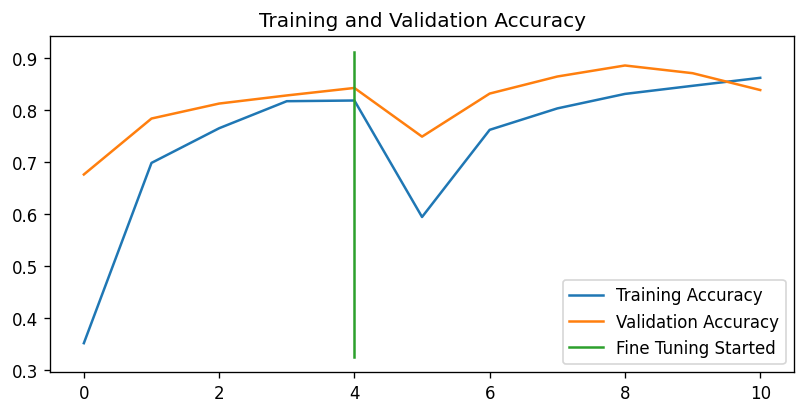

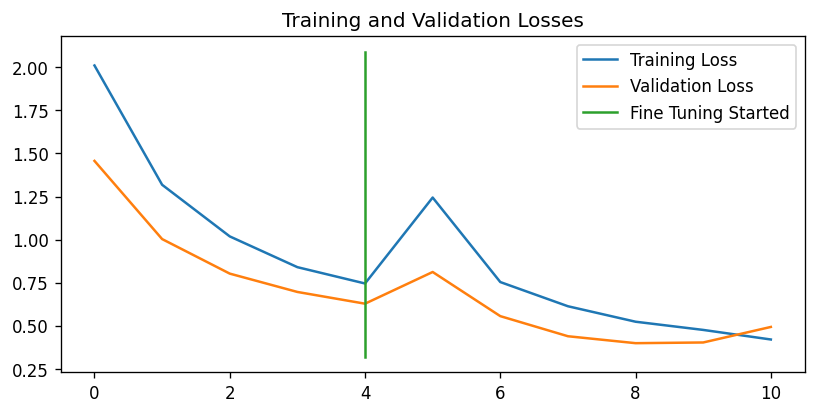

In [39]:
compare_histories(model_2_history, model_2_history_fine_100pc)